# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

638

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = base_url + "appid=" + api_key + "&units=" + units + "&q="
count = 0
cities_final = []
city_id = []
url_list = []
print('Beginning Data Retrieval')
print('-----------------------------')
for city in cities:
    count += 1
    print(f'Processing Record {count} | {city}')
    response = requests.get(query_url + city).json()
    city_num = response.get("id")
    if response.get("id"):
        print(f'City ID = {city_num}')
        url_list.append(response)
        cities_final.append(city)
        city_id.append(city_num)
    else:
        print("City not found. Skipping...")
print('-----------------------------')
print('Data Retrieval Complete')


Beginning Data Retrieval
-----------------------------
Processing Record 1 | nuuk
City ID = 3421319
Processing Record 2 | mar del plata
City ID = 3863379
Processing Record 3 | mizdah
City ID = 2214827
Processing Record 4 | hambantota
City ID = 1244926
Processing Record 5 | hobart
City ID = 2163355
Processing Record 6 | punta arenas
City ID = 3874787
Processing Record 7 | saint-philippe
City ID = 6138908
Processing Record 8 | mataura
City ID = 6201424
Processing Record 9 | cherskiy
City ID = 2126199
Processing Record 10 | christchurch
City ID = 2192362
Processing Record 11 | busselton
City ID = 2075265
Processing Record 12 | kapaa
City ID = 5848280
Processing Record 13 | cape town
City ID = 3369157
Processing Record 14 | albany
City ID = 5106834
Processing Record 15 | grindavik
City ID = 3416888
Processing Record 16 | thompson
City ID = 6165406
Processing Record 17 | waddan
City ID = 2209055
Processing Record 18 | yellowknife
City ID = 6185377
Processing Record 19 | tuatapere
City ID = 

City ID = 3173615
Processing Record 160 | nome
City ID = 4732862
Processing Record 161 | kaitangata
City ID = 2208248
Processing Record 162 | belushya guba
City not found. Skipping...
Processing Record 163 | ribeira grande
City ID = 3372707
Processing Record 164 | padang
City ID = 1633419
Processing Record 165 | ruteng
City ID = 1629380
Processing Record 166 | mount gambier
City ID = 2156643
Processing Record 167 | iqaluit
City ID = 5983720
Processing Record 168 | san lorenzo
City ID = 3601977
Processing Record 169 | talnakh
City ID = 1490256
Processing Record 170 | tarko-sale
City ID = 1490085
Processing Record 171 | port elizabeth
City ID = 4501427
Processing Record 172 | tumannyy
City not found. Skipping...
Processing Record 173 | butaritari
City ID = 2110227
Processing Record 174 | sangar
City ID = 2017215
Processing Record 175 | nikolskoye
City ID = 546105
Processing Record 176 | hermanus
City ID = 3366880
Processing Record 177 | vardo
City ID = 4372777
Processing Record 178 | atu

City ID = 4670234
Processing Record 316 | batemans bay
City ID = 2176639
Processing Record 317 | ca mau
City ID = 1586443
Processing Record 318 | boyolangu
City ID = 1648082
Processing Record 319 | abu samrah
City ID = 172515
Processing Record 320 | ewa beach
City ID = 5855051
Processing Record 321 | noyabrsk
City ID = 1496503
Processing Record 322 | juliaca
City ID = 3937513
Processing Record 323 | eldorado
City ID = 4007812
Processing Record 324 | kidal
City ID = 2455290
Processing Record 325 | lingyuan
City ID = 2036075
Processing Record 326 | teknaf
City ID = 1185095
Processing Record 327 | brownsburg
City ID = 4255056
Processing Record 328 | krasnyy bogatyr
City ID = 541844
Processing Record 329 | svetlyy
City not found. Skipping...
Processing Record 330 | kysyl-syr
City ID = 2021017
Processing Record 331 | privolnaya
City ID = 505109
Processing Record 332 | arthur
City ID = 5693294
Processing Record 333 | kalmunai
City ID = 1242110
Processing Record 334 | charters towers
City ID 

City ID = 2445553
Processing Record 473 | iberia
City ID = 3938531
Processing Record 474 | sorland
City ID = 3137469
Processing Record 475 | bogorodskoye
City ID = 2126638
Processing Record 476 | kashmor
City ID = 1174653
Processing Record 477 | thaba nchu
City ID = 949703
Processing Record 478 | bulaevo
City ID = 1525014
Processing Record 479 | miragoane
City ID = 3720824
Processing Record 480 | coruripe
City ID = 3465329
Processing Record 481 | ajdabiya
City ID = 89113
Processing Record 482 | shubarshi
City ID = 608270
Processing Record 483 | peddapalli
City ID = 1259961
Processing Record 484 | mapiripan
City ID = 3792394
Processing Record 485 | vila
City ID = 3164565
Processing Record 486 | meadow lake
City ID = 6071421
Processing Record 487 | moindou
City ID = 2140466
Processing Record 488 | malinovoye ozero
City ID = 1499779
Processing Record 489 | iquitos
City ID = 3696183
Processing Record 490 | nosy varika
City ID = 1058080
Processing Record 491 | teya
City ID = 3526662
Process

City ID = 1518296
Processing Record 631 | pemangkat
City not found. Skipping...
Processing Record 632 | magnitogorsk
City ID = 532288
Processing Record 633 | galt
City ID = 5351428
Processing Record 634 | utiel
City ID = 2510075
Processing Record 635 | el badari
City not found. Skipping...
Processing Record 636 | saint anthony
City ID = 5606187
Processing Record 637 | moranbah
City ID = 6533368
Processing Record 638 | palabuhanratu
City not found. Skipping...
-----------------------------
Data Retrieval Complete


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [28]:
country = [url.get("sys").get("country") for url in url_list]
lat = [url.get("coord").get("lat") for url in url_list]
lng = [url.get("coord").get("lon") for url in url_list]
temp = [url.get("main").get("temp") for url in url_list]
humidity = [url.get("main").get("humidity") for url in url_list]
cloudiness =[url.get("clouds").get("all") for url in url_list]
wind = [url.get("wind").get("speed") for url in url_list]

df = pd.DataFrame({
    "City": cities_final,
    "Country": country,
    "Latitude": lat,
    "Longitude": lng,
    "Temperature": temp,
    "Humidity": humidity,
    "Cloudiness": cloudiness, 
    "Wind Speed": wind
})


df.head()

,City,Country,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed
0,nuuk,GL,64.17,-51.74,21.20,92,80,11.41
1,mar del plata,AR,-46.43,-67.52,61.29,42,68,15.03
2,mizdah,LY,31.45,12.98,29.34,74,32,2.17
3,hambantota,LK,6.12,81.12,87.80,70,40,16.11
4,hobart,AU,-42.88,147.33,66.20,55,75,17.22


In [29]:
#df.to_csv(output_data_file)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

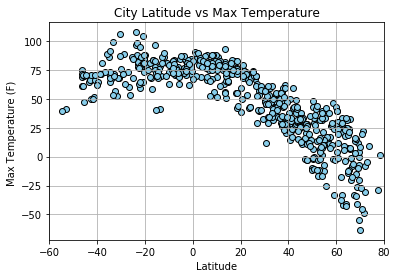

In [41]:
plt.scatter(df["Latitude"], df["Temperature"], marker="o", facecolors = "skyblue", edgecolors="black")

plt.title("City Latitude vs Max Temperature")
plt.ylabel("Max Temperature (F) ")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim(-60,80)

plt.savefig("Lat_vs_MaxTemp.png")
plt.show()

#### Latitude vs. Humidity Plot

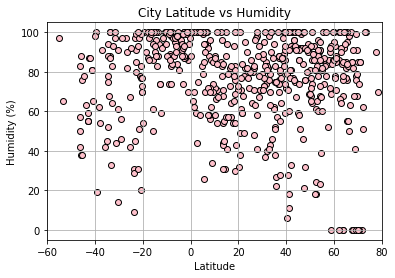

In [38]:
plt.scatter(df["Latitude"], df["Humidity"], marker="o", facecolors = "pink", edgecolors="black")

plt.title("City Latitude vs Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim(-60,80)

plt.savefig("Lat_vs_Humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

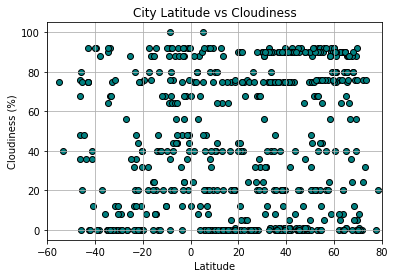

In [39]:
plt.scatter(df["Latitude"], df["Cloudiness"], marker="o", facecolors = "teal", edgecolors="black")

plt.title("City Latitude vs Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim(-60,80)

plt.savefig("Lat_vs_Cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

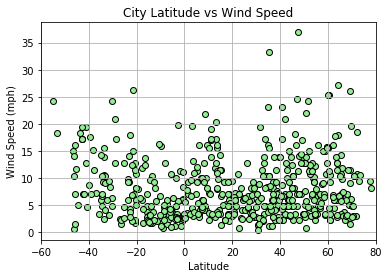

In [40]:
plt.scatter(df["Latitude"], df["Wind Speed"], marker="o", facecolors = "lightgreen", edgecolors="black")

plt.title("City Latitude vs Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim(-60,80)

plt.savefig("Lat_vs_WindSpeed.png")
plt.show()